<a href="https://colab.research.google.com/github/isaevadaryna/Machine-Learning/blob/main/%D0%9B%D0%B0%D0%B1_5%2C_%D0%97%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sns.set(style="whitegrid")

In [2]:
iris = load_iris(as_frame=True)
df_iris = iris.frame
print("Перші 5 рядків:\n", df_iris.head())

X = df_iris.drop(columns=['target'])

# Масштабування
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Перші 5 рядків:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


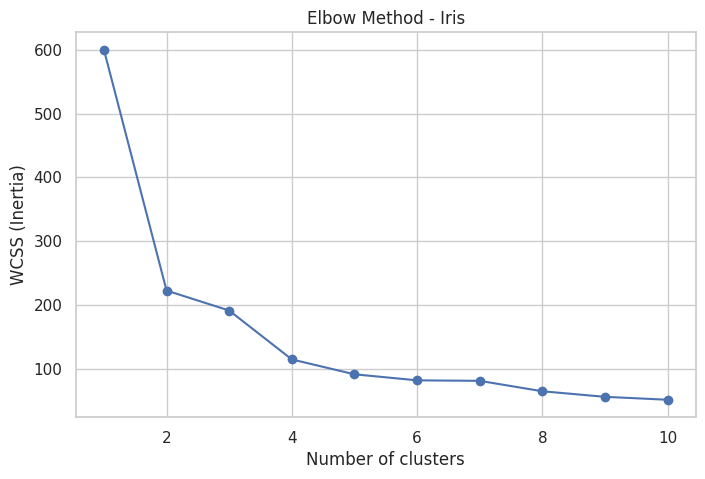

In [3]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method - Iris")
plt.show()

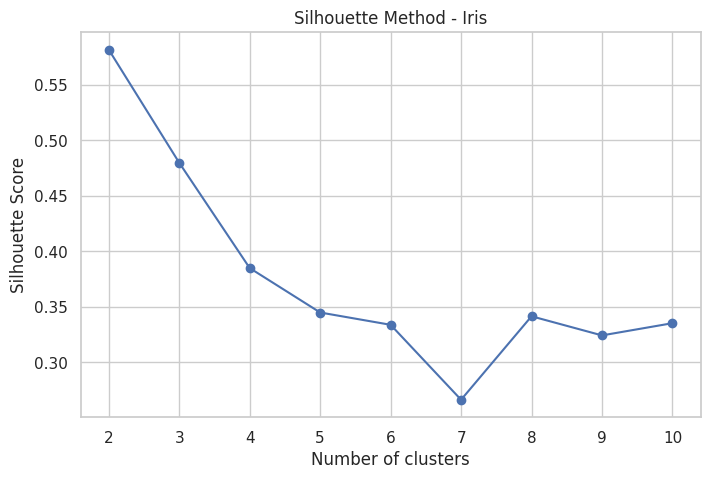

In [4]:
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(8,5))
plt.plot(range(2,11), sil_scores, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method - Iris")
plt.show()

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
df_iris['Cluster'] = labels


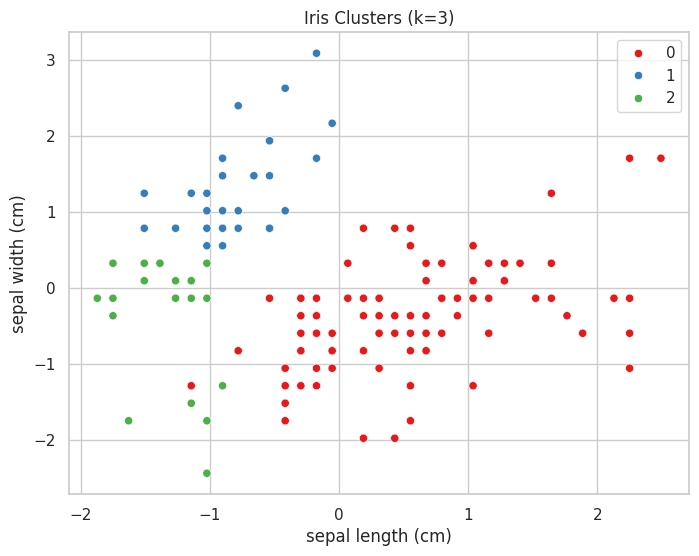

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels, palette='Set1')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Iris Clusters (k=3)")
plt.show()